In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples = 100,n_features = 1,n_informative = 1,n_targets = 1,noise = 20,random_state = 13)

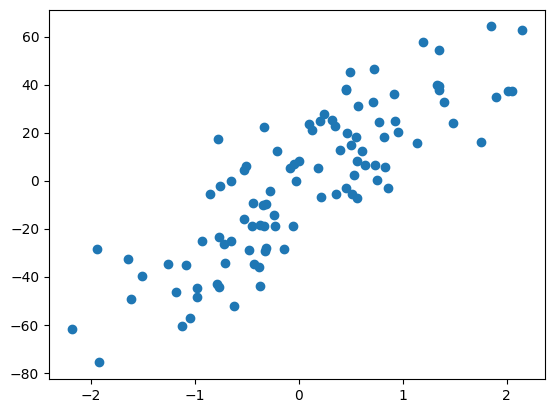

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr = Ridge(alpha= 10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [8]:
rr1 = Ridge(alpha= 100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


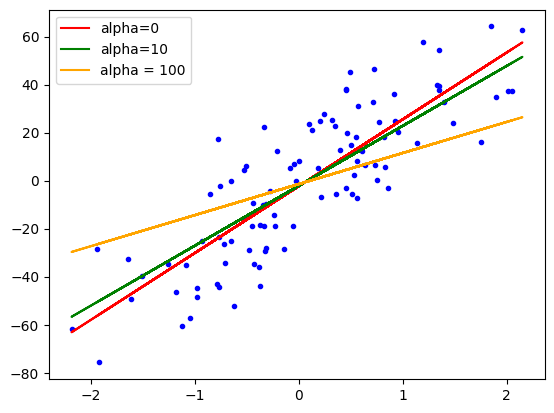

In [9]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label = 'alpha = 100')
plt.legend()
plt.show()

In [10]:
class MeraRidge:
  def __init__(self,alpha = 0.1):
    self.alpha = alpha
    self.m = None
    self.b = None
  def fit(self,X_train,y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + (y_train[i] - y_train.mean())*(X_train[i]-X_train.mean())

      den = den + (X_train[i]-X_train.mean()) * (X_train[i]-X_train.mean())
    self.m = num/(den + self.alpha)
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m,self.b)
  def predict(X_test):
    pass

In [11]:
reg = MeraRidge(alpha = 10)
reg.fit(X,y)

[24.9546267] [-2.126913]


In [12]:
reg = MeraRidge(alpha = 100)
reg.fit(X,y)

[12.93442104] [-1.42484415]


# Ridge Regression For Higher (ND) Data  

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [14]:
X,y = load_diabetes(return_X_y = True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

In [17]:
from sklearn.linear_model import Ridge

In [18]:
reg = Ridge(alpha = 0.1,solver = 'cholesky')

In [19]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [20]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [21]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [22]:
class MeraRidge:
  def __init__(self,alpha = 0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis = 1)
    I = np.identity(X_train.shape[1])
    result = np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
    self.intercept_ = result[0]
    self.coef_ = result[1:]
  def predict(self,X_test):
    return np.dot(X_test,self.coef_)+self.intercept_

In [23]:
X_train

array([[ 0.0090156 , -0.04464164,  0.05522933, ...,  0.02323852,
         0.05568623,  0.10661708],
       [ 0.03081083,  0.05068012, -0.03422907, ...,  0.05755657,
         0.0354587 ,  0.08590655],
       [ 0.01628068, -0.04464164, -0.06332999, ..., -0.03949338,
        -0.05947118, -0.06735141],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 0.01628068,  0.05068012,  0.00996123, ..., -0.03949338,
         0.01703607,  0.00720652],
       [ 0.04897352,  0.05068012,  0.08109682, ...,  0.07120998,
         0.03243232,  0.04862759]])

In [24]:
np.insert(X_train,0,1,axis = 1)

array([[ 1.        ,  0.0090156 , -0.04464164, ...,  0.02323852,
         0.05568623,  0.10661708],
       [ 1.        ,  0.03081083,  0.05068012, ...,  0.05755657,
         0.0354587 ,  0.08590655],
       [ 1.        ,  0.01628068, -0.04464164, ..., -0.03949338,
        -0.05947118, -0.06735141],
       ...,
       [ 1.        ,  0.04170844,  0.05068012, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 1.        ,  0.01628068,  0.05068012, ..., -0.03949338,
         0.01703607,  0.00720652],
       [ 1.        ,  0.04897352,  0.05068012, ...,  0.07120998,
         0.03243232,  0.04862759]])

In [25]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.46921361559931885
[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.84762720023167
